In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

# Reading File and exploring data

In [2]:
df=pd.read_csv('Steel_industry_data.csv')

In [3]:
df.head(8)

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load
5,01/01/2018 01:30,3.28,3.56,0.0,0.0,67.76,100.0,5400,Weekday,Monday,Light_Load
6,01/01/2018 01:45,3.60,4.14,0.0,0.0,65.62,100.0,6300,Weekday,Monday,Light_Load
7,01/01/2018 02:00,3.60,4.28,0.0,0.0,64.37,100.0,7200,Weekday,Monday,Light_Load


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [5]:
df.describe()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,27.386892,13.035384,3.870949,0.011524,80.578056,84.367870,42750.000000
std,33.444380,16.306000,7.424463,0.016151,18.921322,30.456535,24940.534317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21375.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,42750.000000
75%,51.237500,22.640000,2.090000,0.020000,99.022500,100.000000,64125.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [6]:
df.shape

(35040, 11)

# Checking for null values

In [7]:
df.isnull().sum()

date                                    0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_of_week                             0
Load_Type                               0
dtype: int64

In [8]:
df['date']=pd.to_datetime(df['date'])

# One Hot Encoding

One Hot Encoding to transform Weekdays into binary data

In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoder.fit(df)
encoded_data = pd.get_dummies(df['WeekStatus'],drop_first=True)


In [10]:
df.drop(['WeekStatus'],axis=1,inplace=True)
df=pd.concat([df,encoded_data],axis=1)

In [11]:
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Day_of_week,Load_Type,Weekend
0,2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,Monday,Light_Load,0
1,2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,Monday,Light_Load,0
2,2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,Monday,Light_Load,0
3,2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Monday,Light_Load,0
4,2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,Monday,Light_Load,0


Checking correlation between the data attributes

<AxesSubplot:>

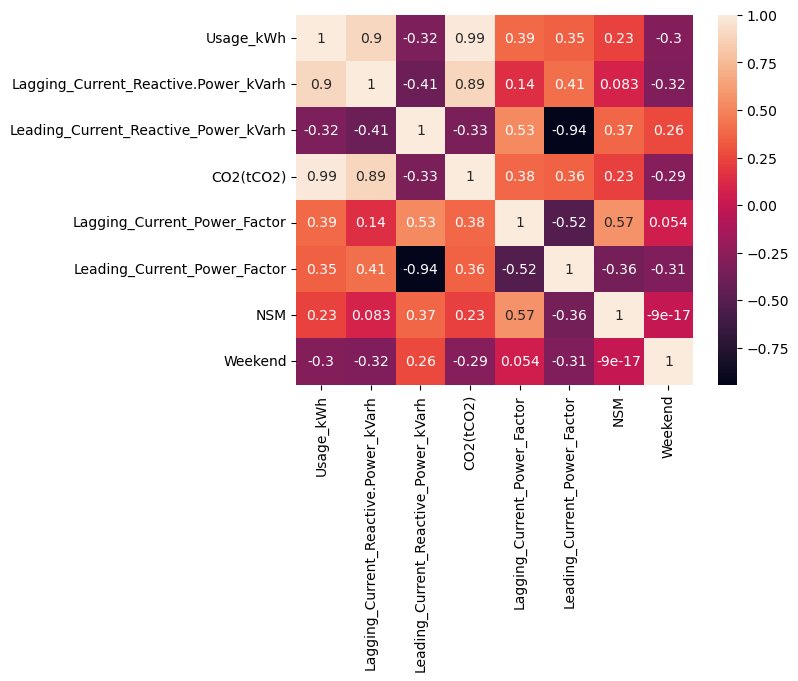

In [12]:
sns.heatmap(df.corr(),annot=True)

It can be noticed that the energy consumption is positively correlated with CO2 production and lagging current reactive power

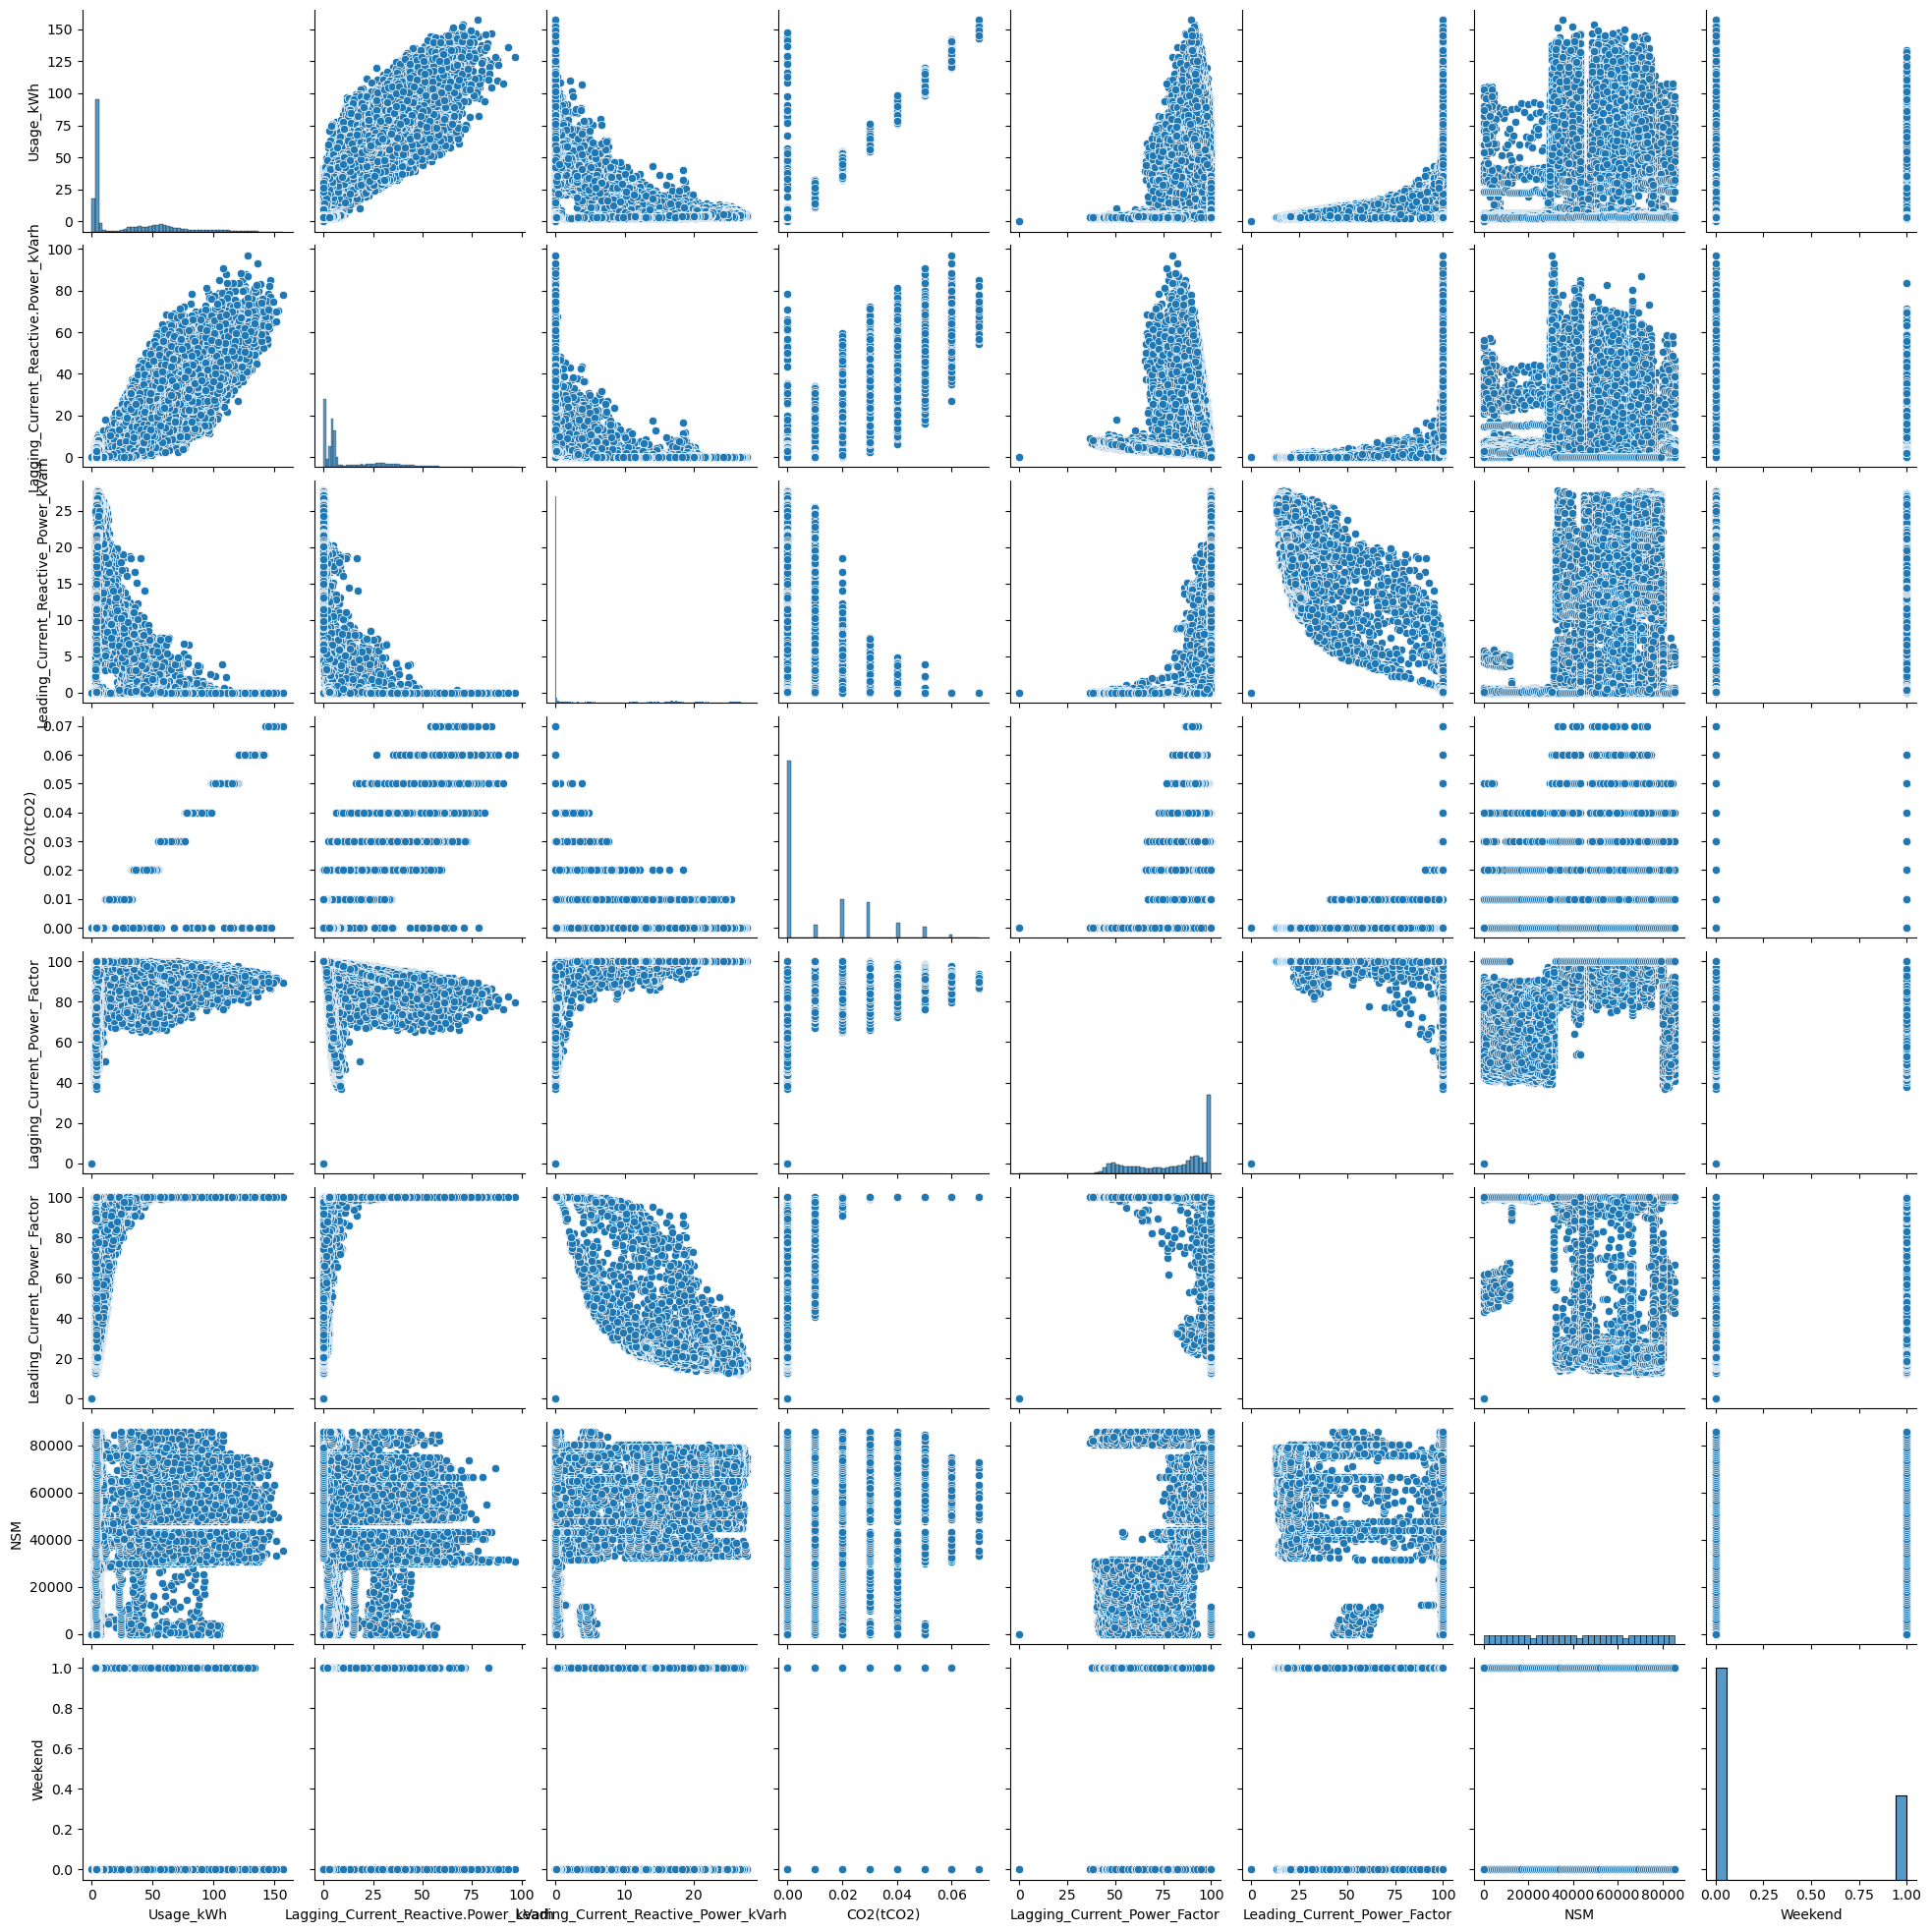

In [13]:
sns.pairplot(df)

In [14]:
df['Month']=df['date'].apply(lambda t: t.month)
df['Month']

0         1
1         1
2         1
3         1
4         1
         ..
35035    12
35036    12
35037    12
35038    12
35039    12
Name: Month, Length: 35040, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='Usage_kWh'>

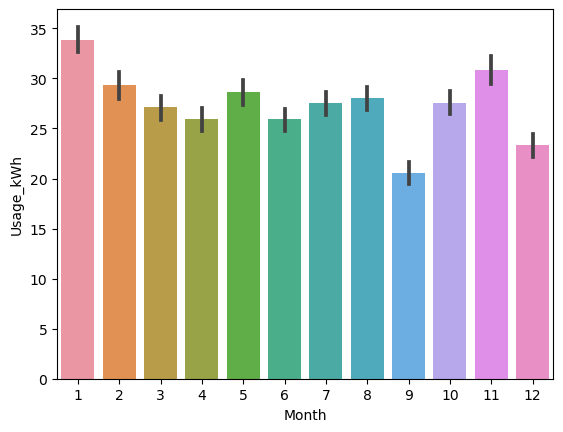

In [15]:
sns.barplot(data=df,x='Month',y='Usage_kWh')

Consumption (steel production) is highest during the months of winter except for December due to holiday season at the end of the year. Electricity consumption in the summer months is also high as the plants may require cool enviroment to ensure machines and enviroment do not overheat.

In [16]:
load_type=pd.pivot_table(data=df,values=['Usage_kWh','NSM'],index=['Load_Type','Day_of_week'])

In [17]:
load_type

NSM  Usage_kWh
Load_Type    Day_of_week                         
Light_Load   Friday       23206.204380  11.361442
             Monday       24026.223776   8.805459
             Saturday     31381.843575   7.072210
             Sunday       39144.653465   4.171106
             Thursday     23206.204380  11.803964
             Tuesday      24074.199288  10.510040
             Wednesday    24074.199288  10.780560
Maximum_Load Friday       53106.000000  61.043700
             Monday       53106.000000  66.278233
             Saturday     52492.105263  41.529605
             Sunday       52826.470588  29.195662
             Thursday     53106.000000  64.522758
             Tuesday      53176.530612  66.023359
             Wednesday    53176.530612  62.358359
Medium_Load  Friday       61758.000000  42.220494
             Monday       61758.000000  43.097231
             Saturday     62218.421053  17.547648
             Sunday       61967.647059  16.368934
             Thursday     61758.000000  44.986200
             Tuesday      61705.102041  45.020797
             Wednesday    61705.102041  40.462379

Text(0.5, 1.0, 'Energy Consumption in each load type')

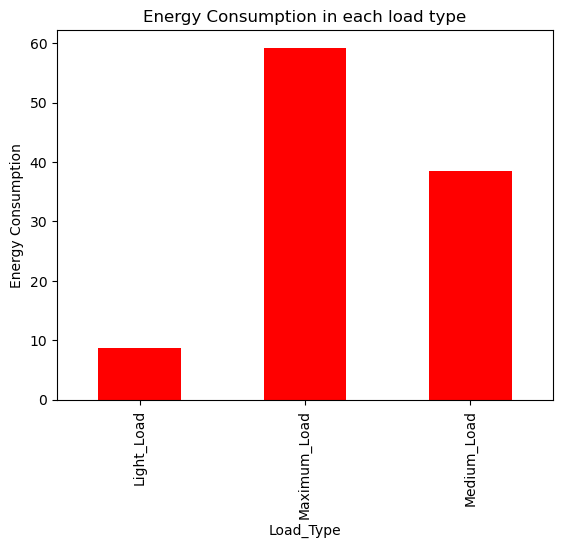

In [18]:
plt.figsize = (8,5)
df.groupby('Load_Type')['Usage_kWh'].mean().plot(kind='bar',color='red')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption in each load type')

It is expected that the energy consumption increases with the increase in load

<AxesSubplot:xlabel='Weekend'>

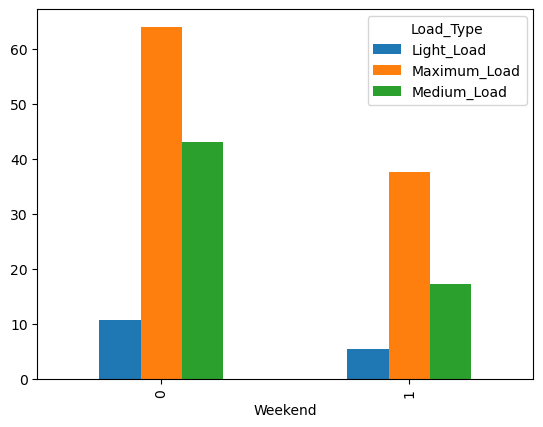

In [19]:
df.groupby(['Weekend','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind='bar')


Industrial plants work full time during weekdays and the production is less on weekends due smaller number of overtime workers, above trends can be expected.

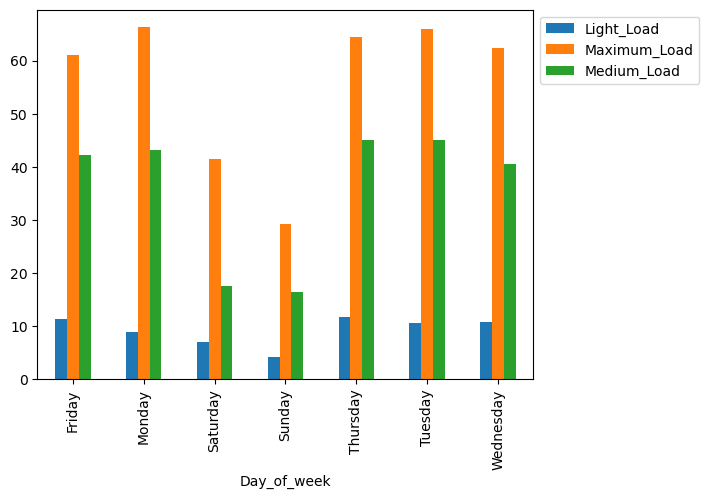

In [20]:
df.groupby(['Day_of_week','Load_Type'])['Usage_kWh'].mean().unstack().plot(kind='bar')
plt.legend(bbox_to_anchor=(1,1))

Energy consumption on weekends is less compared to weekdays as expected. Moreover, it can be noted that energy consumption and therefore production on starting days of the week i.e. Monday & Tuesday, is highest since more number of workers come back after weekend's rest

# Regression Model

In [21]:
load_type= pd.get_dummies(df['Load_Type'],drop_first=True)
Day= pd.get_dummies(df['Day_of_week'],drop_first=True)

In [22]:
df=pd.concat([df,load_type,Day],axis=1)


In [23]:
df.drop(['Load_Type','Day_of_week'],axis=1,inplace=True)

In [24]:
df= df.set_index('date')
df.head()

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Weekend,Month,Maximum_Load,Medium_Load,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
date,,,,,,,,,,,,,,,,,
2018-01-01 00:15:00,3.17,2.95,0.0,0.0,73.21,100.0,900,0,1,0,0,1,0,0,0,0,0
2018-01-01 00:30:00,4.00,4.46,0.0,0.0,66.77,100.0,1800,0,1,0,0,1,0,0,0,0,0
2018-01-01 00:45:00,3.24,3.28,0.0,0.0,70.28,100.0,2700,0,1,0,0,1,0,0,0,0,0
2018-01-01 01:00:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,0,1,0,0,1,0,0,0,0,0
2018-01-01 01:15:00,3.82,4.50,0.0,0.0,64.72,100.0,4500,0,1,0,0,1,0,0,0,0,0


Splitting data in training and testing sets

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
X= df.drop('Usage_kWh',axis=1)
y= df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Creating and Training the Model

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm= LinearRegression()

In [30]:
lm.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

In [32]:
coeff_df= pd.DataFrame(lm.coef_,X.columns,columns=['Coefficients'])

In [66]:
coeff_df

,Coefficients
Lagging_Current_Reactive.Power_kVarh,0.342953
Leading_Current_Reactive_Power_kVarh,0.058650
CO2(tCO2),1623.969171
Lagging_Current_Power_Factor,0.126319
Leading_Current_Power_Factor,0.060125
NSM,-0.000003
Weekend,0.138921
Month,-0.072895
Maximum_Load,1.402799
Medium_Load,1.968357


Interpreting the coefficients

Holding all the features fixed, a 1 unit increase in CO2, is associated with an increase of '1623.97 kWh'

Holding all the features fixed, a 1 unit increase in Lagging Current Reactive Power, is associated with an increase of '0.343 kWh'

Predictions from our Model

In [34]:
predictions=lm.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Model')

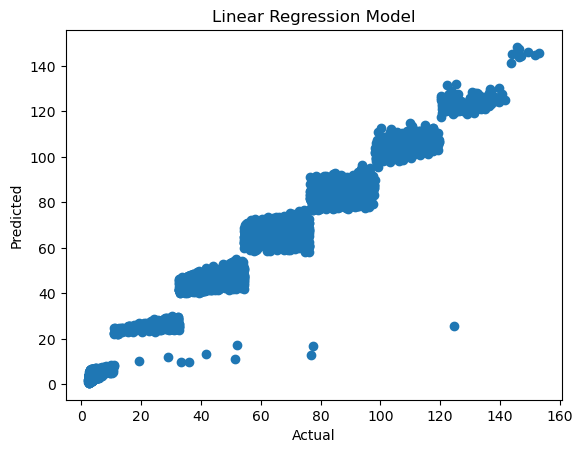

In [38]:
plt.scatter(x=y_test,y=predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Model')

Residual Histogram

<AxesSubplot:xlabel='Usage_kWh', ylabel='Count'>

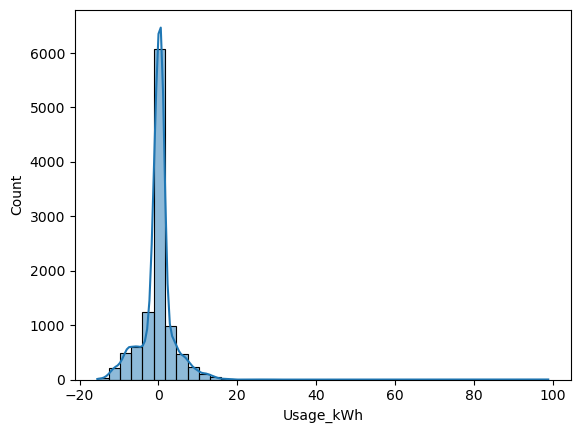

In [48]:
sns.histplot(y_test-predictions,kde=True,bins=40)

Residual values is normally distributed, therefore satisfying Homoscedasticity. 

# Regression Evaluation Metrics

In [51]:
from sklearn import metrics

In [55]:
print('MAE: ', metrics.mean_absolute_error(y_test,predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE:  2.563418117002132
MSE:  17.757211025520018
RMSE:  4.213930590970859


In [64]:
lm.score(X_test,y_test)

0.9841790128266589

The Linear Regression Model is suitable for predicting energy consumption with an accuracy of 98%

# Feature Selection 

Energy consumption is highly correlated with two factors being CO2 production & Lagging current reactive power. Using these features to assess the prediction accuracy of the model

In [67]:
X= df[['Lagging_Current_Reactive.Power_kVarh','CO2(tCO2)']]
y= df['Usage_kWh']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
new_lm=LinearRegression()

In [70]:
new_lm.fit(X_train,y_train)

LinearRegression()

In [72]:
new_coeff_df= pd.DataFrame(new_lm.coef_,X.columns,columns=['Coefficients'])
new_coeff_df

,Coefficients
Lagging_Current_Reactive.Power_kVarh,0.210882
CO2(tCO2),1856.963452


In [79]:
new_predictions=new_lm.predict(X_test)

In [80]:
print('MAE: ', metrics.mean_absolute_error(y_test,new_predictions))
print('MSE: ',metrics.mean_squared_error(y_test,predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE:  2.7357027938159253
MSE:  18.94357957162772
RMSE:  4.352422264857549


In [81]:
new_lm.score(X_test,y_test)

0.9831220044077214

From the values above it can noted that the accuracy level of the model does not change much demonstrating that our target variable (Energy Consumption) majorly depends on two factors, CO2 production & Lagging current reactive power. 